<h1>Analise de dados Eixo Anhanguera</h1>

<h2>Bibliotecas nescessarias</h2>
<ol>
    <li>Pandas</li>
    <li>Seaborn</li>
    <li>Numpy</li>
    <li>Math</li>
    <li>DataTime</li>
    <li>Sklearn</li>
</ol>

In [4]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import math
from random import randint
from calendario import Feriados_Brasil
from datetime import date,timedelta
from pandas.tseries.offsets import CustomBusinessDay
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import random
%matplotlib inline

<h3>Metodo: map_dia_semana </h3>
<strong>Descrição: </strong> Este metodo é responsavel por trocar as <strong><i>labels</i></strong> da coluna 'dia_semana' por seu desvio padrão.<br>
<strong>Paramentros: </strong> Não Há parametros<br>



In [17]:
def map_dia_semana():
    medias = df.groupby(['dia_semana']).mean()
    mapa = {"seg":medias['Demandas']['seg'],"ter":medias['Demandas']['ter'],"qua":medias['Demandas']['qua'],"qui":medias['Demandas']['qui'],"sex":medias['Demandas']['sex'],"sab":medias['Demandas']['sab'],"dom":medias['Demandas']['dom']}
    print(mapa)
    df['dia_semana'] = df['dia_semana'].map(mapa)

<h3>Metodo: map_classe </h3>
<strong>Descrição: </strong> Este metodo é responsavel por trocar as <strong><i>labels</i></strong> da coluna 'Classe' por seu desvio padrão.<br>
<strong>Paramentros: </strong> Não Há parametros<br>



In [18]:
def map_classe():
    medias = df.groupby(['Classe']).mean()
    mapa = {"dia letivo":medias['Demandas']['dia letivo'],"ferias":medias['Demandas']['ferias'],"feriado":medias['Demandas']['feriado'],"pre feriado 1":medias['Demandas']['pre feriado 1'],"pre feriado 2":medias['Demandas']['pre feriado 2'],"pos feriado 1":medias['Demandas']['pos feriado 1'],"pos feriado 2":medias['Demandas']['pos feriado 2']}
    print(mapa)
    df['Classe'] = df['Classe'].map(mapa)

<h3>Metodo: plot_dispersao_dia_semana </h3>
<strong>Descrição: </strong> Este metodo é responsavel por Exibir visualmente a disperção dos dados para a coluna 'dia_semana'<br>
<strong>Paramentros: </strong> Não Há parametros<br>

In [19]:
def plot_dispersao_dia_semana():
    fig, axs = plt.subplots(7,1)
    seg = df.query("dia_semana=='seg'")
    ter = df.query("dia_semana=='ter'")
    qua = df.query("dia_semana=='qua'")
    qui = df.query("dia_semana=='qui'")
    sex = df.query("dia_semana=='sex'")
    sab = df.query("dia_semana=='sab'")
    dom = df.query("dia_semana=='dom'")
    fig.set_size_inches(15,25)
    sb.set_context("notebook", font_scale=1.10)
    sb.scatterplot(x=range(len(dom)),y="Demandas",data=dom,ax=axs[0],color="tomato",label="Domingo")
    sb.scatterplot(x=range(len(seg)),y="Demandas",data=seg,ax=axs[1],color="orange",label="Segunda Feira")
    sb.scatterplot(x=range(len(ter)),y="Demandas",data=ter,ax=axs[2],color="dodgerblue",label="Terca Feira")
    sb.scatterplot(x=range(len(qua)),y="Demandas",data=qua,ax=axs[3],color="mediumseagreen",label="Quarta Feira")
    sb.scatterplot(x=range(len(qui)),y="Demandas",data=qui,ax=axs[4],color="gray",label="Quinta Feira")
    sb.scatterplot(x=range(len(sex)),y="Demandas",data=sex,ax=axs[5],color="slateblue",label="Sexta Feira")
    sb.scatterplot(x=range(len(sab)),y="Demandas",data=sab,ax=axs[6],color="violet",label="Sabado")

<h3>Metodo: plot_media_dia_semana </h3>
<strong>Descrição: </strong> Este metodo é responsavel por Exibir visualmente a media dos dados para a coluna 'dia_semana'<br>
<strong>Paramentros: </strong> Não Há parametros<br>


In [20]:
def plot_media_dia_semana():
    fig,axs = plt.subplots()
    media_dia_semana = df.groupby(['dia_semana']).mean()
    media_dia_semana["Dia da Semana"] = np.unique(df["dia_semana"].values)
    print(media_dia_semana)
    fig.set_size_inches(15,5)
    sb.barplot(x="Dia da Semana",y="Demandas",data=[10,20,30])

In [21]:
def plot_media_classe():
    fig,axs = plt.subplots()
    media_dia_semana = df.groupby(['Classe']).mean()
    media_dia_semana["Classe"] = np.unique(df["Classe"].values)
    fig.set_size_inches(15,5)
    sb.barplot(x="Classe",y="Demandas",data=media_dia_semana)

In [22]:
df = pd.read_csv("dados brutos.csv")

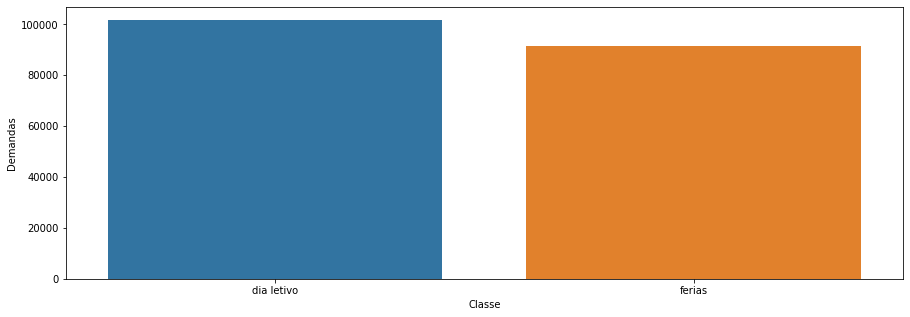

In [23]:
plot_media_classe()

In [24]:
def plot_media_classe():
    fig,_ = plt.subplots()
    medias_classe = df.groupby("Classe").mean()
    medias_classe["Classes"] = np.unique(df["Classe"])
    fig.set_size_inches(10,5)
    sb.barplot(x="Classes",y="Demandas",data=medias_classe)

In [25]:
def plot_media_classe_dia_semana(dia_semana):
    fig,_ = plt.subplots()
    dados = df.query("dia_semana == '" + dia_semana + "'")
    medias_classe = dados.groupby("Classe").mean()
    medias_classe["Classes"] = np.unique(dados["Classe"])
    fig.set_size_inches(10,5)
    sb.barplot(x="Classes",y="Demandas",data=medias_classe)

In [26]:
def classificar():
    feriados = Feriados_Brasil()
    feriados = feriados.holidays(date(year=2012,month=12,day=31),date(year=2016,month=12,day=31))
    pre_feriados1 = [(data-timedelta(days=1)).date() for data in feriados]
    pre_feriados2 = [(data-timedelta(days=2)).date() for data in feriados]
    pos_feriados1 = [(data + timedelta(days=1)).date() for data in feriados]
    pos_feriados2 = [(data + timedelta(days=2)).date() for data in feriados]
    del pre_feriados1[0];
    del pre_feriados2[0];
    for f in feriados:
        df["Classe"][str(f.date())] = "feriado";

    for pf1 in pre_feriados1:
        df["Classe"][str(pf1)] = "pre feriado 1";

    for pf2 in pre_feriados2:
        df["Classe"][str(pf2)] = "pre feriado 2";

    for ps1 in pos_feriados1:
        df["Classe"][str(ps1)] = "pos feriado 1";

    for ps2 in pos_feriados2:
        df["Classe"][str(ps2)] = "pos feriado 2";

In [27]:
def remover_ruidos():
    media = df.groupby("Classe").mean()
    std = df.groupby("Classe").std()
    minimo = media - 2*std
    maximo = media + 2*std
    ruidosMin = [ruido for ruido in df["Demandas"]
                                   [(df["Demandas"] < minimo["Demandas"]["ferias"]) 
                                    & (df["Demandas"] < minimo["Demandas"]["pre feriado 1"])
                                    & (df["Demandas"] < minimo["Demandas"]["pre feriado 2"])
                                    & (df["Demandas"] < minimo["Demandas"]["pos feriado 1"])
                                    & (df["Demandas"] < minimo["Demandas"]["pos feriado 2"])
                                    & (df["Demandas"] < minimo["Demandas"]["dia letivo"])]]

    ruidosMax = [ruido for ruido in df["Demandas"]
                                   [(df["Demandas"] > maximo["Demandas"]["ferias"]) 
                                    & (df["Demandas"] > maximo["Demandas"]["pre feriado 1"])
                                    & (df["Demandas"] > maximo["Demandas"]["pre feriado 2"])
                                    & (df["Demandas"] > maximo["Demandas"]["pos feriado 1"])
                                    & (df["Demandas"] > maximo["Demandas"]["pos feriado 2"])
                                    & (df["Demandas"] > maximo["Demandas"]["dia letivo"])]]
    
    ruidos = [ruidosMin,ruidosMax]
    for vetor in ruidos:
        for valor in vetor:
            aux = df.query("Demandas == " + str(valor))
            df.drop(aux.index,inplace=True)

In [28]:
def plot_ruidos_classe():
    fig, axs = plt.subplots(4,2)
    fig.set_size_inches(12,25)
    axs[3,1].remove()
    sb.boxplot(data=df.query("Classe == 'ferias'"),ax=axs[0,0],color="tomato")
    sb.boxplot(data=df.query("Classe == 'pre feriado 1'"),ax=axs[0,1],color="orange")
    sb.boxplot(data=df.query("Classe == 'pre feriado 2'"),ax=axs[1,0],color="dodgerblue")
    sb.boxplot(data=df.query("Classe == 'pos feriado 1'"),ax=axs[1,1],color="mediumseagreen")
    sb.boxplot(data=df.query("Classe == 'pos feriado 2'"),ax=axs[2,0],color="gray")
    sb.boxplot(data=df.query("Classe == 'dia letivo'"),ax=axs[2,1],color="slateblue")
    sb.boxplot(data=df.query("Classe == 'ferias'"),ax=axs[3,0],color="violet")

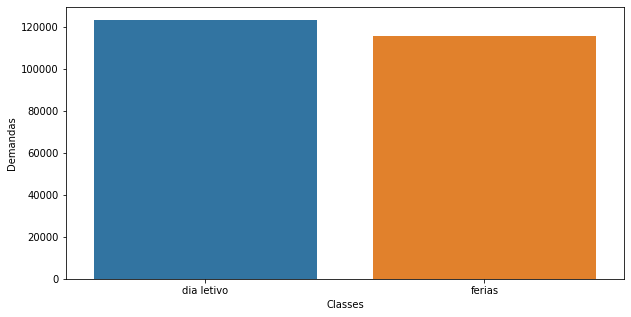

In [29]:
plot_media_classe_dia_semana('seg')

In [30]:
def plot_ruidos_dia_semana():
    fig, axs = plt.subplots(4,2)
    fig.set_size_inches(20,25)
    axs[3,1].remove()
    sb.boxplot(data=df.query("dia_semana == 'seg'"),ax=axs[0,0],color="tomato")
    sb.boxplot(data=df.query("dia_semana == 'ter'"),ax=axs[0,1],color="orange")
    sb.boxplot(data=df.query("dia_semana == 'qua'"),ax=axs[1,0],color="dodgerblue")
    sb.boxplot(data=df.query("dia_semana == 'qui'"),ax=axs[1,1],color="mediumseagreen")
    sb.boxplot(data=df.query("dia_semana == 'sex'"),ax=axs[2,0],color="gray")
    sb.boxplot(data=df.query("dia_semana == 'sab'"),ax=axs[2,1],color="slateblue")
    sb.boxplot(data=df.query("dia_semana == 'dom'"),ax=axs[3,0],color="violet")


In [31]:
def normalizacao():
    maximoD = df["Demandas"].max()
#     maximoDia = df["dia_semana"].max()
#     maximoC = df["Classe"].max()
    df["Demandas"] = df["Demandas"]/maximoD
#     df["dia_semana"] = df["dia_semana"]/maximoD
#     df["Classe"] = df["Classe"]/maximoD

In [32]:
date_parser = lambda datas: pd.datetime.strptime(datas,'%d/%m/%Y')
df = pd.read_csv("dados brutos.csv",parse_dates=['Datas'],index_col='Datas',date_parser=date_parser);

In [33]:
classificar()

C:\Users\chrys\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\chrys\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\chrys\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\chrys\Anaconda3\lib\site-packages

In [34]:
def amostragem(tam):
    date_parser = lambda datas: pd.datetime.strptime(datas,'%d/%m/%Y')
    amostra = pd.DataFrame(columns=['dia_semana','Demandas','Classe','Datas']);
    sorteados = []
    k = 0;
    datas = []
    classes = df.groupby('Classe').mean().index
    for classe in classes:
        c = []
        vetor = df.query("Classe == " + "'" + classe + "'")
        n = len(vetor)
        for j in range(tam):
            num = randint(0,n-1)
            while({classe:num} in sorteados):
                num = randint(0,n-1);
            sorteados.append({classe:num});
            datas.append(vetor.index[num])
            amostra.loc[vetor.index[num]] = vetor.loc[vetor.index[num]]
            k = k + 1;
    amostra['Datas'] = datas;
    return amostra;

                 Demandas Dia da Semana
dia_semana                             
dom          33823.620192           dom
qua         119753.837321           qua
qui         116247.086124           qui
sab          69829.698565           sab
seg         122109.399038           seg
sex         115162.976077           sex
ter         122352.789474           ter


AttributeError: 'list' object has no attribute 'get'

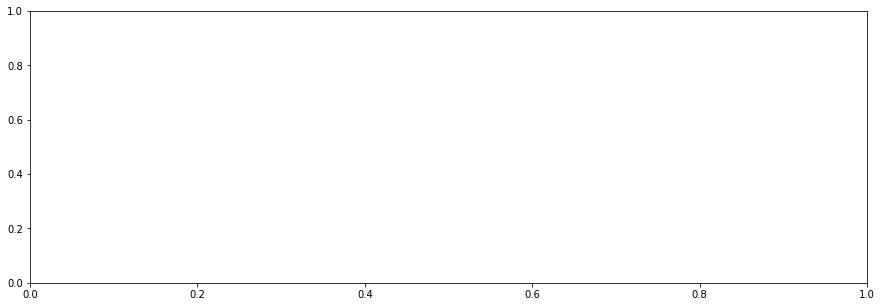

In [35]:
plot_media_dia_semana()
plt.savefig("media_dia_semana")

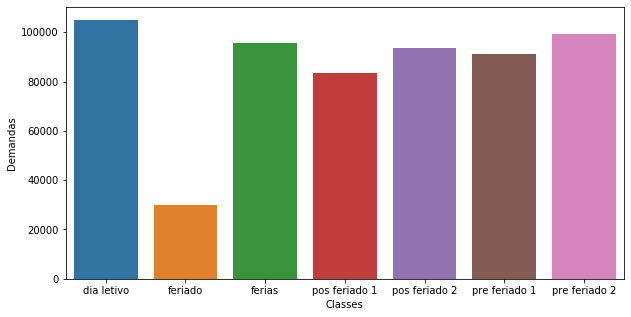

In [36]:
plot_media_classe()
plt.savefig("media_classe")

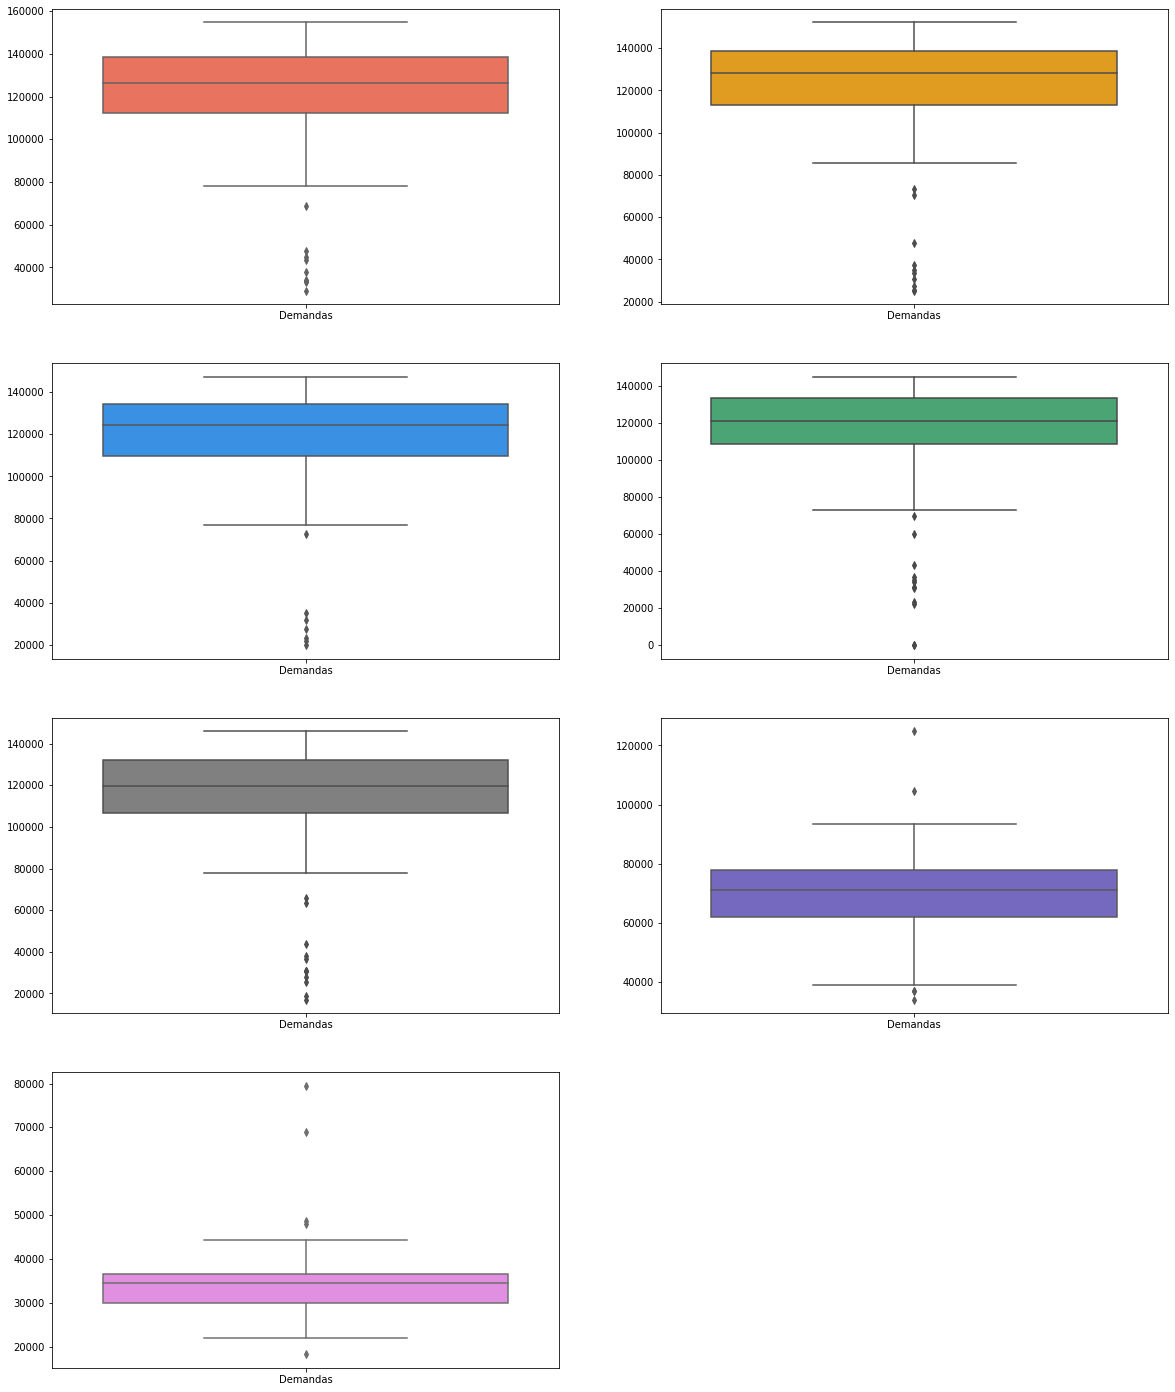

In [37]:
plot_ruidos_dia_semana()

In [38]:
df = amostragem(40)
df = df.set_index('Datas')
df['Demandas'] = df['Demandas'].apply(pd.to_numeric)
# str(vetor.index[num])
# vetor.loc[vetor.index[0]]

In [ ]:
normalizacao()

In [ ]:
remover_ruidos()

In [ ]:
map_classe()

In [ ]:
map_dia_semana()

In [39]:
# a = np.array((df.iloc[0],df.iloc[1]))
# b = np.array()
# np.concatenate((a,b),axis=0)
entradas = np.array([[np.array(df.iloc[i+3]["dia_semana"]),np.array(df.iloc[i+3]["Classe"]),np.array(df.iloc[i]["Demandas"]),np.array(df.iloc[i+1]["Demandas"]),np.array(df.iloc[i+2]["Demandas"])] for i in range(0,len(df)-2,3)])
saidas = np.array([np.array([np.array(df.iloc[i+3]["Demandas"])]) for i in range(0,len(df)-2,3)])
# entradas = list()
# saidas = list()
# for i in range(0,len(df)-1,3):
#     entradas.append(np.concatenate((np.array(df.iloc[i]),np.array(df.iloc[i+1]),np.array(df.iloc[i+2])),axis=0))
#     saidas.append(np.array(df.iloc[i+3]))

In [40]:
treino_entrada,teste_entrada,treino_saida,teste_saida = train_test_split(entradas,saidas)

In [41]:
model = Sequential()
model.add(Dense(16,input_dim=5, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mean_squared_error'])
model.fit(treino_entrada, treino_saida, epochs=1000, batch_size=5)
scores = model.evaluate(treino_entrada, treino_saida)

C:\Users\chrys\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, input_dim=5, activation="relu", kernel_initializer="uniform")`
  





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\chrys\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until





Epoch 1/1000







ValueError: could not convert string to float: 'sab'

In [30]:
predictions = model.predict(teste_entrada)

In [31]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

mean_squared_error: 0.88%


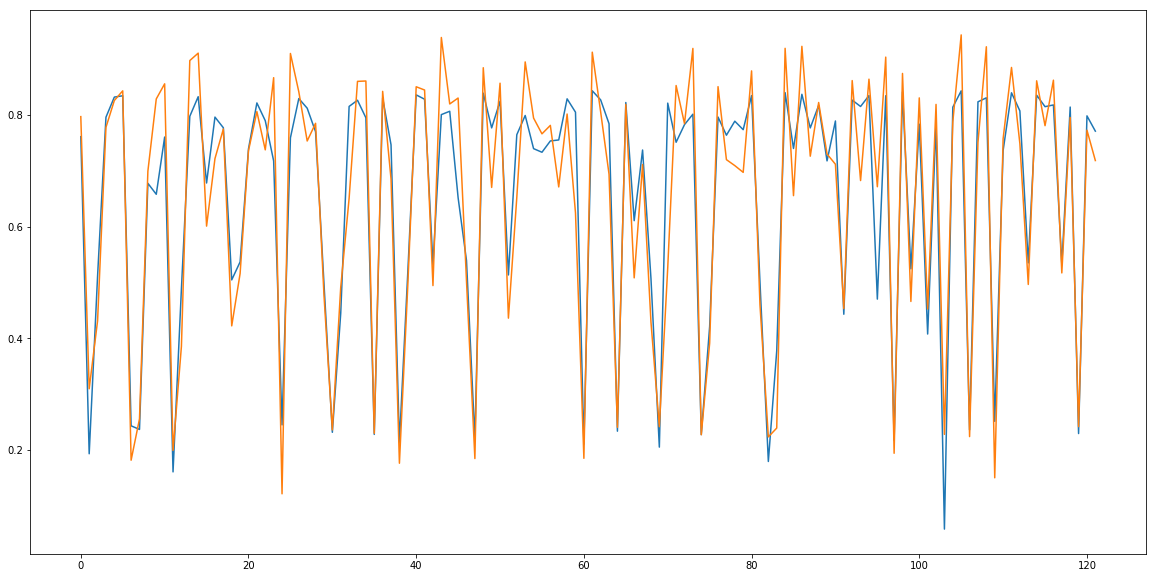

In [33]:
fig, axs = plt.subplots()
fig.set_size_inches(20,10)
plt.plot(predictions)
plt.plot(teste_saida)
plt.savefig("previsao.jpg")

In [34]:
def poisson(media):
    r = 0;
    a = random.random()
    p = math.exp(-media)
    
    while a > p:
        r += 1
        a = a - p
        p = p * media/r
    return r

In [35]:
def get_atendimento_maximo(cromossomos,capacidade):
    return np.array([np.sum(cromossomo)*capacidade for cromossomo in cromossomos])

def get_atendimento_efetivo(demanda,cromossomos,capacidade):
    return np.array([np.sum(c)*capacidade - np.sum(demanda) for c in cromossomos])

def get_taxa_de_atendimento(cromossomo,capacidade):
    return np.array([1/(intervalo/(np.sum(c)*capacidade)) for c in cromossomos])

def get_tempo_espera_medio(demandas,taxa_de_atendimento):
    saida = dict()
    i = 0
    for t in taxa_de_atendimento:
        saida[i] = (np.mean(demandas)/t)
        i += 1;
    return saida

In [36]:
 def get_melhores(cromossomos,quantidade):
        melhores = sorted(cromossomos.items(), key = lambda e: (e[1], e[0]), reverse = False)
        return melhores[:quantidade]

In [37]:
 def get_piores(cromossomos,quantidade):
        melhores = sorted(cromossomos.items(), key = lambda e: (e[1], e[0]), reverse = True)
        return melhores[:quantidade]

In [38]:
def crossover(cromossomos,qtd):
    for i in range(qtd):
        melhores = get_melhores(tempo_espera_medio,10) 
        piores = get_piores(tempo_espera_medio,5)
        aux = melhores+piores
        chaves = [chave for  chave,_ in aux]
        chaves,prob = penalizar_disperdicio(chaves,cromossomos,demanda,capacidade)
        populacao = list()
        chave1 = np.random.choice(chaves,p=prob)
        chave2 = np.random.choice(chaves,p=prob)

        while(chave1 == chave2):
            chave1 = np.random.choice(chaves,p=prob)
            chave2 = np.random.choice(chaves,p=prob)

        filho1 = cromossomos[chave1]
        filho2 = cromossomos[chave2]
        i = random.randint(0,len(filho1))
        j= random.randint(i,len(filho1))

        while i == j:
            i = random.randint(0,len(filho1))
            j= random.randint(0,len(filho1))

        aux = filho1[i:j]
        filho1[i:j] = filho2[i:j]
        filho2[i:j] = aux

        populacao.append(filho1)
        populacao.append(filho2)
    for chave in chaves:
        populacao.append(cromossomos[chave])
    return np.array(populacao)
        

In [39]:
def penalizar_disperdicio(chaves,cromossomos,demanda,capacidade):
    saida = dict()
    for chave in chaves:
        saida[chave] = 0
        for i in range(len(cromossomos[chave])):
            if(demanda[i] < (cromossomos[chave][i]*capacidade)):
                saida[chave] += 1
    saida = np.array(sorted(saida.items(), key = lambda e: (e[1], e[0]), reverse = False))
    chaves = [chave for chave,_ in saida]
    valores = [valor for _,valor in saida]
    partes = 1/np.sum(valores);
    prob = dict()
    i = 0
    j = 0
    s = 0
    for v in valores:
        prob[i] = 1;
        s += v
        prob[i] = (s * partes)
        i += 1
    x = [valor for _,valor in prob.items()]
    x = x/np.sum(x)
    return [chaves,x[::-1]]

In [40]:
def mutacoes(cromossomos,qtd):
    for i in range(qtd):
        chave = random.randint(0,len(cromossomos)-1)
        c = cromossomos[chave]
        i = random.randint(0,len(c)-1)
        j= random.randint(i,len(c)-1)

        while i == j:
            i = random.randint(0,len(c)-1)
            j= random.randint(0,len(c)-1)

        aux = c[j:j]
        c[j] = c[i:i]
        c[i] = aux
        cromossomos[chave] = c
    return cromossomos

In [ ]:
horasI,minutosI = (5,45)
horasF,minutosF =(8,15)
tempoInicial = horasI*60 + minutosI
tempoFinal = horasF*60 + minutosF
intervalo = tempoFinal - tempoInicial
janela = 1
media = 847#108956
demanda = np.array([poisson(media) for i in range(0,intervalo,janela)])
numCromossomos = 1000
inicio,fim = (300,500)
cromossomos = np.array(
               [[np.poisson(random.randrange(inicio,fim)/len(demanda))
               for i in range(0,intervalo,janela)]
               for _ in range(0,numCromossomos)])
capacidade = 170
num_geracoes = 100
mediaAte = list();
mediaTTA = list();
mediaTEM = list();

In [ ]:
cromossomos

In [ ]:
chaves = [i for i in range(len(cromossomos))]

In [ ]:
chaves,prob = penalizar_disperdicio(chaves,cromossomos,demanda,capacidade)

In [ ]:
for i in range(num_geracoes):
    atendimento_maximo = get_atendimento_maximo(cromossomos,capacidade)
    atendimento_efetivo = get_atendimento_efetivo(demanda,cromossomos,capacidade)
    taxa_de_atendimento = get_taxa_de_atendimento(cromossomos,capacidade)
    tempo_espera_medio = get_tempo_espera_medio(demanda,taxa_de_atendimento)
    mediaAte.append(np.mean(atendimento_efetivo))
    mediaTTA.append(np.mean(taxa_de_atendimento))
    mediaTEM.append(np.mean([valor for _,valor in tempo_espera_medio.items()]))
    cromossomos = crossover(cromossomos,100)



In [ ]:
atendimento_maximo = get_atendimento_maximo(cromossomos,capacidade)
atendimento_efetivo = get_atendimento_efetivo(demanda,cromossomos,capacidade)
taxa_de_atendimento = get_taxa_de_atendimento(cromossomos,capacidade)
tempo_espera_medio = get_tempo_espera_medio(demanda,taxa_de_atendimento)

In [ ]:
# atendimento_maximo = get_atendimento_maximo(melhor,capacidade)
# atendimento_efetivo = get_atendimento_efetivo(demanda,melhor,capacidade)
# taxa_de_atendimento = get_taxa_de_atendimento(melhor,capacidade)
# tempo_espera_medio = get_tempo_espera_medio(demanda,taxa_de_atendimento)
# get_atendimento_efetivo(demanda,cromossomos[0],capacidade)


In [ ]:
#atendimento efetivo
fig, axs = plt.subplots(1,1)
fig.set_size_inches(10,4)
plt.plot(mediaAte)

In [ ]:
#atendimento efetivo
fig, axs = plt.subplots(1,1)
fig.set_size_inches(10,4)
plt.plot(mediaTEM)

In [ ]:
#taxa_de_atendimento
fig, axs = plt.subplots(1,1)
fig.set_size_inches(10,4)
plt.plot(mediaTTA)

In [ ]:
melhores = get_melhores(tempo_espera_medio,10) 

In [ ]:
!pip freeze > '../working/requiriment.txt'

In [ ]:
melhores

In [ ]:
np.sum(cromossomos[0])

In [ ]:
demanda